$$
\newcommand{\R}{\mathbb{R}}
\newcommand{\vec}[1]{\textbf{#1}}
\newcommand{\vecg}[1]{\boldsymbol{#1}}
\newcommand{\h}{h_{\vecg{\theta}}}
\newcommand{\inner}[2]{\langle{#1},{#2}\rangle}
\newcommand{\pd}[1]{\frac{\partial}{\partial{#1}}}
$$
# Normal Equation

In the previous sections, we implemented linear regression using gradient descent, which is an iterative way of solving. When we have only one output variable (i.e. when $\vec{y}$ is a vector), another way of solving our problem is the so-called **normal equation**, which gives us our result analytically. 

## Derivation

Let us define our observations as a matrix $\vec x \in \R^{n \times m}$ and the coefficients as $\vecg\theta \in \R^m$.

Thus we have our hypothesis and cost functions:
$$
\begin{align}
h_{\vecg\theta} &= h(\vecg\theta) = \vec{X}\vecg\theta \\
J(\vecg\theta) &= -\frac{1}{2n}\sum_i^n{ (\h^i - \vec y^i)^2 }
\end{align}
$$

Let us define our prediction error as $\vec e = \h - \vec y$. Rewriting our cost function, we have:
$$
\begin{align}
J(\vecg\theta) &= -\frac{1}{2n}\sum_i^n{ (\vec e ^i)^2 }
\end{align}
$$

Notice that we have each of the elements of $\vec{e}$ squared, and then summed. This is the dot product! So we could rewrite our cost function as:
$$
J(\vecg\theta) = -\frac{1}{2n}\inner{\vec e}{\vec e} = -\frac{1}{2n}\vec e ^T\vec e
$$

Expanding $J$:
$$
\begin{align}
J &= \vec e^T\vec e \\
&= (\h - \vec y)^T(\h - \vec y) \\
&= (\vec x\vecg\theta  - \vec y)^T(\vec x\vecg\theta  - \vec y) \\
&= ((\vec x\vecg\theta)^T - \vec y^T)(\vec x\vecg\theta - \vec y) \\
&= (\vec x\vecg\theta)^T\vec x\vecg\theta - (\vec x\vecg\theta)^T\vec y - \vec y^T\vec x\vecg\theta + \vec y^T\vec y
\end{align}
$$

All the terms in $J$ are scalar and elements of $\R$, which allows us to flip the dot products:

$$
\begin{align}
J &= (\vec x\vecg\theta)^T\vec x\vecg\theta - (\vec x\vecg\theta)^T\vec y - (\vec x\vecg\theta)^T\vec y + \vec y^T\vec y \\
&= \vecg\theta^T\vec x^T\vec x\vecg\theta  - 2(\vec x\vecg\theta)^T\vec y + \vec y^T\vec y \\
&= (\vec x^T\vec x)\vecg \theta^T\vecg\theta - 2(\vec x\vecg\theta)^T\vec y + \vec y^T\vec y
\end{align}
$$

Our goal is to minimze $J$ which we can do by setting the partial derivatives to $0$. However, let us first note that:

$$
\pd{\vec x} \vec x^T\vec x = \nabla \sum_i{x_i^2} =
\begin{pmatrix}
2x_0 \\
2x_1 \\
... \\
2x_N
\end{pmatrix} = 2\vec x
$$

Computing the partial derivatives we have:
$$
\pd{\vecg\theta}J = \pd{\vecg\theta} \Big[ (\vec x^T\vec x)\vecg \theta^T\vecg\theta - 2(\vec x\vecg\theta)^T\vec y + \vec y^T\vec y \Big] = 2\vec x^T\vec x\vecg\theta -2\vec x^T\vec y
$$

And setting them to $\vec 0$
$$
\begin{align}
2\vec x^T\vec x\vecg\theta -2\vec y^T\vec x &= \vec 0 \\
\vec x^T\vec x\vecg\theta &= \vec y^T\vec x \\
\vecg\theta &= (\vec x^T\vec x)^{-1}\vec y^T\vec x
\end{align}
$$

We get the normal equation:
$$
\vecg\theta = (\vec x^T\vec x)^{-1}\vec y^T\vec x
$$

## Pros and Cons

### Pros

- Doesn't need iteration
- No need to choose a learning rate

### Cons

- Quickly gets slow when $m$ (the number of features) grows large
- Quickly loses accuracy.

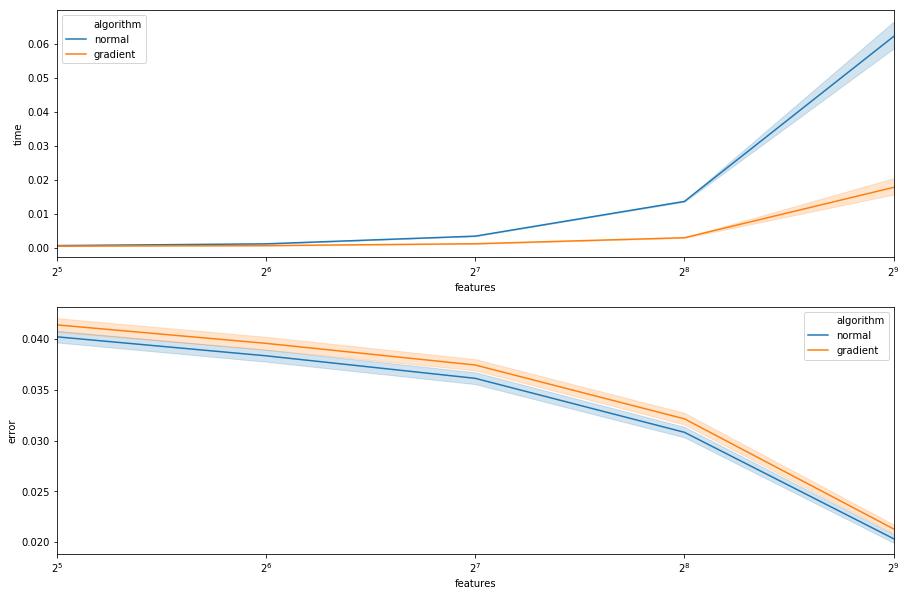

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from timeit import default_timer as timer

def J(X, Y, theta):
    N = X.shape[0]
    return np.sum((X @ theta - Y) ** 2, axis=0) / (2*N)

def makeDataSet(M, N=1000):
    data = pd.DataFrame([])
    data['x0'] = np.ones(N)
    for i in range(1, M+1):
        c = f"x{i}"
        data[c] = np.random.normal(0, 1, N)
        data[c] = (data[c] - data[c].mean()) / data[c].std()
        
    theta = np.random.rand(M+1) * 10
    data['y'] = data[data.columns] @ theta + (np.random.rand(N))
    return data,theta

def gradientDescent(X, Y, accuracy=0.1):
    alpha = 1 / (10 ** (np.log10(X.shape[0]) * 0.1))
    theta = np.zeros(X.shape[0])
    N = X.shape[1]
    def dJ(theta):
        p = theta @ X - Y
        return (-1/N) * np.inner(p, X)
    
    dj = 1e100
    lim = 1e-2 / X.shape[0]
    while J(X.T, Y, theta) > accuracy:
        dj1 = dJ(theta)
        if np.all(np.abs(dj) < np.abs(dj1)):
            print("Diverged...")
            break
        dj = dj1
        theta = theta + alpha * dj
    return theta

def normal(X, Y):
    return np.linalg.pinv(X.T @ X) @ (Y.T @ X)

times = []
MIN_N, MAX_N, STEP = 5, 10, 1
for i in np.arange(MIN_N, MAX_N, STEP):
    for j in range(20):
        m = 2 ** i
        data,THETA = makeDataSet(m)
        X = data[data.columns[:m+1]].to_numpy()
        Y = data[data.columns[m+1]].to_numpy()
        
        t0 = timer()
        answer = normal(X, Y)
        t1 = timer()
        times.append((m, t1 - t0, J(X, Y, answer), 'normal'))
        
        t0 = timer()
        answer = gradientDescent(X.T, Y, accuracy=J(X, Y, answer) * 1.05)
        t1 = timer()
        times.append((m, t1 - t0, J(X, Y, answer), 'gradient'))
        
        

df = pd.DataFrame(times, columns=('features', 'time', 'error', 'algorithm'))

fig,ax = plt.subplots(2**1, 1, figsize=(15, 10))
sns.lineplot(data=df, x='features', y='time', hue='algorithm', ax=ax[0])
sns.lineplot(data=df, x='features', y='error', hue='algorithm', ax=ax[1])
for a in ax.flatten():
    a.set_xscale('log', basex=2)
    a.set_xlim(2 ** MIN_N, 2 ** (MAX_N - 1))
    a.set_xticks(2 ** np.arange(MIN_N, MAX_N, STEP))

As you can see in the above graph, gradient descent is a lot faster than the normal equation, even when it is set to produce similar accuracy.